In [ ]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

eta_hat, phi_hat, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None, None

with h5py.File("Z:\\files\\simulation_1d_compressed.h5", "r") as data:
    eta_hat = data["eta_hat"][:]
    phi_hat = data["phi_hat"][:]
    Hs = data["Hs"][:]
    Tp = data["Tp"][:]
    time = data["time"][:]

    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]
    x = np.linspace(0, length, 2*modes)

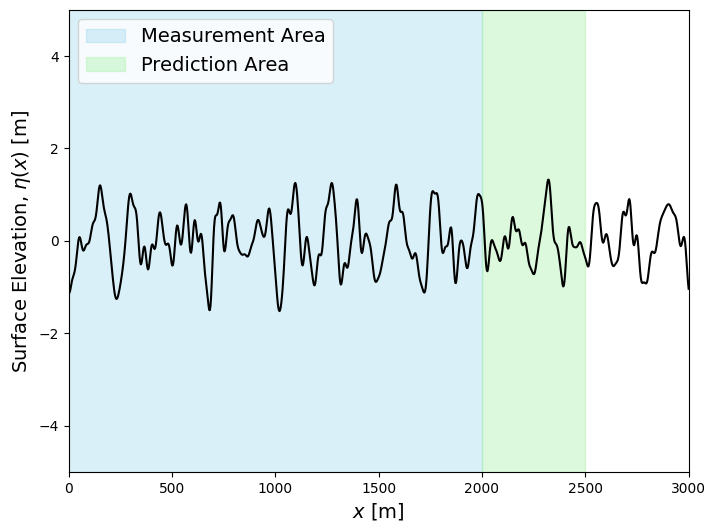

In [ ]:
y = irfft(eta_hat[0, 200, :])
x = np.linspace(0, length, len(y))

fontsize = 14

fig, axs = plt.subplots(figsize=(8, 6))
plt.plot(x, y, color="k")
plt.xlim(0, length)
plt.ylim(-5, 5)
plt.axvspan(0, 2000, color='skyblue', alpha=0.3, label='Measurement Area')
plt.axvspan(2000, 2500, color='lightgreen', alpha=0.3, label='Prediction Area')
axs.grid(True, which='major', linewidth=0.8)
axs.minorticks_on()
axs.grid(True, which='minor', linestyle=':', linewidth=0.5)
axs.tick_params(labelsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlabel(fr"$x$ [m]", fontsize=fontsize)
plt.ylabel(fr"Surface Elevation, $\eta(x)$ [m]", fontsize=fontsize)
plt.show()

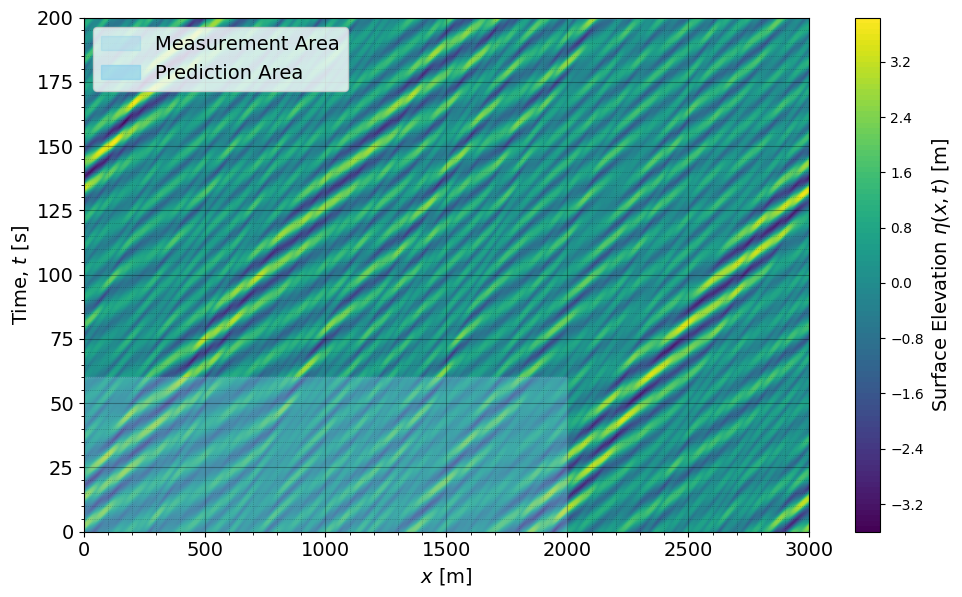

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import irfft

# Generate 2D data array (shape should be [280, len(x)])
# Your eta_hat is assumed to be [5, 400:680, :] and irfft is applied along axis=-1
y = np.array([irfft(eta_hat[5, i, :]) for i in range(400, 400+401)])
t = time[0:401]
x = x  # Assuming this is already defined

X, T = np.meshgrid(x, t)

fig, ax = plt.subplots(figsize=(10, 6))

# Contour plot
c = ax.contourf(X, T, y, levels=100, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"Surface Elevation $\eta(x, t)$ [m]", fontsize=fontsize)

# Highlight measurement area
ax.axvspan(0, 2000, ymin=0, ymax=60/t[-1], color='skyblue', alpha=0.3, label='Measurement Area')

# Highlight prediction area
ax.axvspan(2000, 2500, ymin=200/np.max(t), ymax=200/np.max(t), color='skyblue', alpha=0.6, label='Prediction Area')

# Labels and formatting
ax.set_xlabel(r"$x$ [m]", fontsize=fontsize)
ax.set_ylabel(r"Time, $t$ [s]", fontsize=fontsize)
ax.legend(loc="upper left", fontsize=fontsize)
plt.tight_layout()
ax.grid(True, which='major', linewidth=0.8, color="k", alpha=0.3)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color="k", alpha=0.3)
ax.tick_params(labelsize=fontsize)
plt.show()


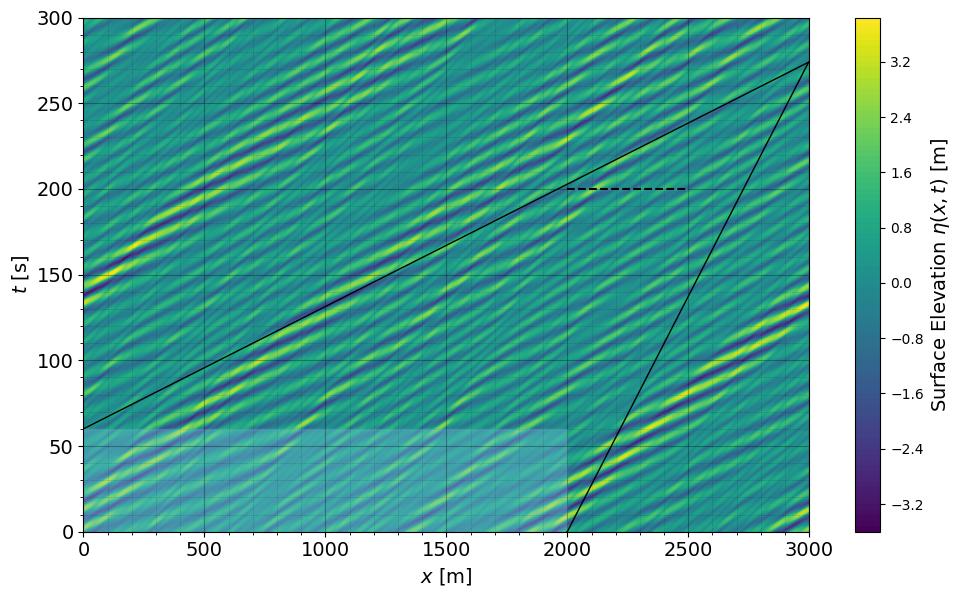

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import irfft

# Generate 2D data array (shape should be [280, len(x)])
# Your eta_hat is assumed to be [5, 400:680, :] and irfft is applied along axis=-1
y = np.array([irfft(eta_hat[5, i, :]) for i in range(400, 400+601)])
t = time[0:601]
x = x  # Assuming this is already defined

X, T = np.meshgrid(x, t)

fig, ax = plt.subplots(figsize=(10, 6))

# Contour plot
c = ax.contourf(X, T, y, levels=100, cmap='viridis')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"Surface Elevation $\eta(x, t)$ [m]", fontsize=fontsize)

# Highlight measurement area
ax.axvspan(0, 2000, ymin=0, ymax=60/np.max(t), color='skyblue', alpha=0.3, label='Measurement Area')

# Highlight prediction area
ax.axvspan(2000, 2500, ymin=200/np.max(t), ymax=200/np.max(t), color='skyblue', alpha=0.6, label='Prediction Area')

# Labels and formatting
ax.set_xlabel(r"$x$ [m]", fontsize=fontsize)
ax.set_ylabel(r"Time, $t$ [s]", fontsize=fontsize)
# ax.legend(loc="upper left", fontsize=fontsize)
plt.tight_layout()
ax.grid(True, which='major', linewidth=0.8, color="k", alpha=0.3)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color="k", alpha=0.3)
ax.tick_params(labelsize=fontsize)


e_min = 0
e_max = 2000

c_min = 3.64
c_max = 14.01

T = 60

x_min = -1200
x_max = 3300
y_min = -250
y_max = 300



x1 = (e_min*c_max - c_min*e_max) / (c_max - c_min) - T * (c_max * c_min) / (c_max - c_min)
t1 = (x1 - e_max) / c_max

x2 = (e_max*c_max - c_min*e_min) / (c_max - c_min) + T * (c_max * c_min) / (c_max - c_min)
t2 = (x2 - e_max) / c_min

points_x = [T, t2, 0, t1, T]
points_y = [e_min, x2, e_max, x1, e_min]

box_x = [T, T, 0, 0] #T]
box_y = [e_min, e_max, e_max, e_min] #, e_min]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{c_{{\min}}}}$", 
    r"eq2", 
    r"eq3", 
    r"eq4"
]

equations = [
    fr"$t=\frac{{x - \xi_{{\min}}}}{{C_{{\max}}}} + T$",
    fr"$t = \frac{{x - \xi_{{\max}}}}{{C_{{\min}}}}$", 
    fr"$t = \frac{{x - \xi_{{\min}}}}{{C_{{\min}}}}$", 
    fr"$t=\frac{{x - \xi_{{\max}}}}{{C_{{\max}}}} + T$"
]

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)

ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

for index in range(len(points_x)-1):
    x0, x1 = points_y[index], points_y[index+1]   # matplotlib x-coords
    y0, y1 = points_x[index], points_x[index+1]

    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2

    plt.plot([x0, x1], [y0, y1], color="k", linewidth=1)
    # plt.plot(box_y[index:index+2], box_x[index:index+2], color="k", linewidth=1)

# plt.fill(box_y, box_x, color="white", hatch='///', edgecolor='black', linewidth=1, label="Measurement Area")

# plt.grid()
# plt.title("Predictable Zone With continous measurement:\n" + fr" $\xi (t, x), \quad x \in [0, 2000], t \in [0, 60]$" + "\n" + fr"$C_{{g,\min}}={c_min:.2f}m/s, \quad C_{{g,\max}}={c_max:.2f}m/s$", fontsize=20)
plt.ylabel("$t$ [s]", fontsize=fontsize)
plt.xlabel("$x$ [m]", fontsize=fontsize)

# plt.plot([points_y[1], 0], [points_x[1], points_x[1]],"k--")
# plt.plot([points_y[3], 0], [points_x[3], points_x[3]],"k--")
# plt.text(0-x_max*0.01, points_x[1], fr"$T_e$", ha="right", va="center", fontsize=fontsize)
# plt.text(0+x_max*0.01, points_x[3], fr"$T_s$", ha="left", va="center", fontsize=fontsize)

# plt.text(x_max*0.95, -y_max*0.01, fr"$x$", ha="right", va="top", fontsize=fontsize)
# plt.text(x_max*0.01, y_max*0.95, fr"$t$", ha="left", va="top", fontsize=fontsize)
# plt.text(points_y[0], points_x[0], fr"$T$", ha="left", va="bottom", fontsize=fontsize)
# plt.text(points_y[2], points_x[2]-y_max*0.01, fr"$\xi_{{max}}$", ha="left", va="top", fontsize=fontsize)
# plt.text(e_min, 0-y_max*0.01, fr"$\xi_{{min}}$", ha="left", va="top", fontsize=fontsize)
# ax.annotate('', xy=(x_max*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
# ax.annotate('', xy=(0, y_max*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
# ax.annotate('', xy=(x_min*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
# ax.annotate('', xy=(0, y_min*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))

plt.xlim(0, length)
plt.ylim(0, 300)
cut_index = np.argmin(np.abs(x-2000))
cut_index_2 = np.argmin(np.abs(x-2500))
plt.plot([x[cut_index], x[cut_index_2]], [200, 200], "--", color = "k", label="Prediction")
# plt.title(fr"$T$: 60s, $C_{{\min}}$: {c_min:.2f}m/s, $C_{{\max}}$: {c_max:.2f}m/s, $\xi_{{\min}}$: {e_min:.0f}m, $\xi_{{\max}}$: {e_max:.0f}m", fontsize=fontsize)
plt.show()


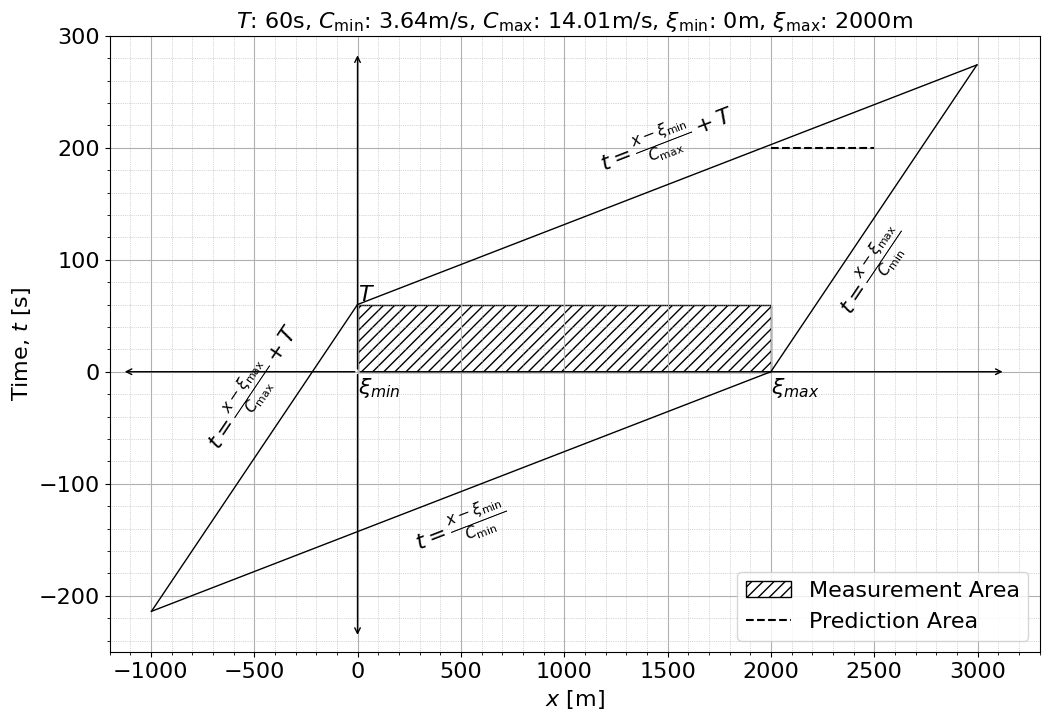

In [86]:
import matplotlib.pyplot as plt
import numpy as np

e_min = 0
e_max = 2000

c_min = 3.64
c_max = 14.01

T = 60

x_min = -1200
x_max = 3300
y_min = -250
y_max = 300



x1 = (e_min*c_max - c_min*e_max) / (c_max - c_min) - T * (c_max * c_min) / (c_max - c_min)
t1 = (x1 - e_max) / c_max

x2 = (e_max*c_max - c_min*e_min) / (c_max - c_min) + T * (c_max * c_min) / (c_max - c_min)
t2 = (x2 - e_max) / c_min

points_x = [T, t2, 0, t1, T]
points_y = [e_min, x2, e_max, x1, e_min]

box_x = [T, T, 0, 0] #T]
box_y = [e_min, e_max, e_max, e_min] #, e_min]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{c_{{\min}}}}$", 
    r"eq2", 
    r"eq3", 
    r"eq4"
]

equations = [
    fr"$t=\frac{{x - \xi_{{\min}}}}{{C_{{\max}}}} + T$",
    fr"$t = \frac{{x - \xi_{{\max}}}}{{C_{{\min}}}}$", 
    fr"$t = \frac{{x - \xi_{{\min}}}}{{C_{{\min}}}}$", 
    fr"$t=\frac{{x - \xi_{{\max}}}}{{C_{{\max}}}} + T$"
]

fontsize = 16
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

ax = plt.gca()
transform = ax.transData.transform

for index in range(len(points_x)-1):
    x0, x1 = points_y[index], points_y[index+1]   # matplotlib x-coords
    y0, y1 = points_x[index], points_x[index+1]

    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2

    # compute angle in degrees for text rotation
    (x0_disp, y0_disp) = transform((x0, y0))
    (x1_disp, y1_disp) = transform((x1, y1))
    angle = np.degrees(np.arctan2(y1_disp - y0_disp, x1_disp - x0_disp))+[0, 180, 180, 0][index]

    # place the equation string
    plt.text(xm, ym, equations[index],
             rotation=angle,
             ha="center", va=["bottom", "top", "top", "bottom"][index],
             fontsize=fontsize)

    plt.plot([x0, x1], [y0, y1], color="k", linewidth=1)
    # plt.plot(box_y[index:index+2], box_x[index:index+2], color="k", linewidth=1)

plt.fill(box_y, box_x, color="white", hatch='///', edgecolor='black', linewidth=1, label="Measurement Area")

# plt.grid()
# plt.title("Predictable Zone With continous measurement:\n" + fr" $\xi (t, x), \quad x \in [0, 2000], t \in [0, 60]$" + "\n" + fr"$C_{{g,\min}}={c_min:.2f}m/s, \quad C_{{g,\max}}={c_max:.2f}m/s$", fontsize=20)
plt.ylabel("Time, $t$ [s]", fontsize=fontsize)
plt.xlabel("$x$ [m]", fontsize=fontsize)

# plt.plot([points_y[1], 0], [points_x[1], points_x[1]],"k--")
# plt.plot([points_y[3], 0], [points_x[3], points_x[3]],"k--")
# plt.text(0-x_max*0.01, points_x[1], fr"$T_e$", ha="right", va="center", fontsize=fontsize)
# plt.text(0+x_max*0.01, points_x[3], fr"$T_s$", ha="left", va="center", fontsize=fontsize)

# plt.text(x_max*0.95, -y_max*0.01, fr"$x$", ha="right", va="top", fontsize=fontsize)
# plt.text(x_max*0.01, y_max*0.95, fr"$t$", ha="left", va="top", fontsize=fontsize)
plt.text(points_y[0], points_x[0], fr"$T$", ha="left", va="bottom", fontsize=fontsize)
plt.text(points_y[2], points_x[2]-y_max*0.01, fr"$\xi_{{max}}$", ha="left", va="top", fontsize=fontsize)
plt.text(e_min, 0-y_max*0.01, fr"$\xi_{{min}}$", ha="left", va="top", fontsize=fontsize)
ax.annotate('', xy=(x_max*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_max*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(x_min*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_min*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))


cut_index = np.argmin(np.abs(x-2000))
cut_index_2 = np.argmin(np.abs(x-2500))
plt.plot([x[cut_index], x[cut_index_2]], [200, 200], "--", color = "k", label="Prediction Area")
plt.title(fr"$T$: 60s, $C_{{\min}}$: {c_min:.2f}m/s, $C_{{\max}}$: {c_max:.2f}m/s, $\xi_{{\min}}$: {e_min:.0f}m, $\xi_{{\max}}$: {e_max:.0f}m", fontsize=fontsize)

ax.tick_params(labelsize=fontsize)
plt.legend(loc = 4, fontsize=fontsize)
plt.savefig("results/case_1d.pdf", dpi=300, bbox_inches='tight')
plt.show()

# jupyter nbconvert ML_update.ipynb --to pdf --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['hide_input']" --TagRemovePreprocessor.remove_all_outputs_tags="['hide_output']" --PDFExporter.preprocessors="['nbconvert.preprocessors.TagRemovePreprocessor']"

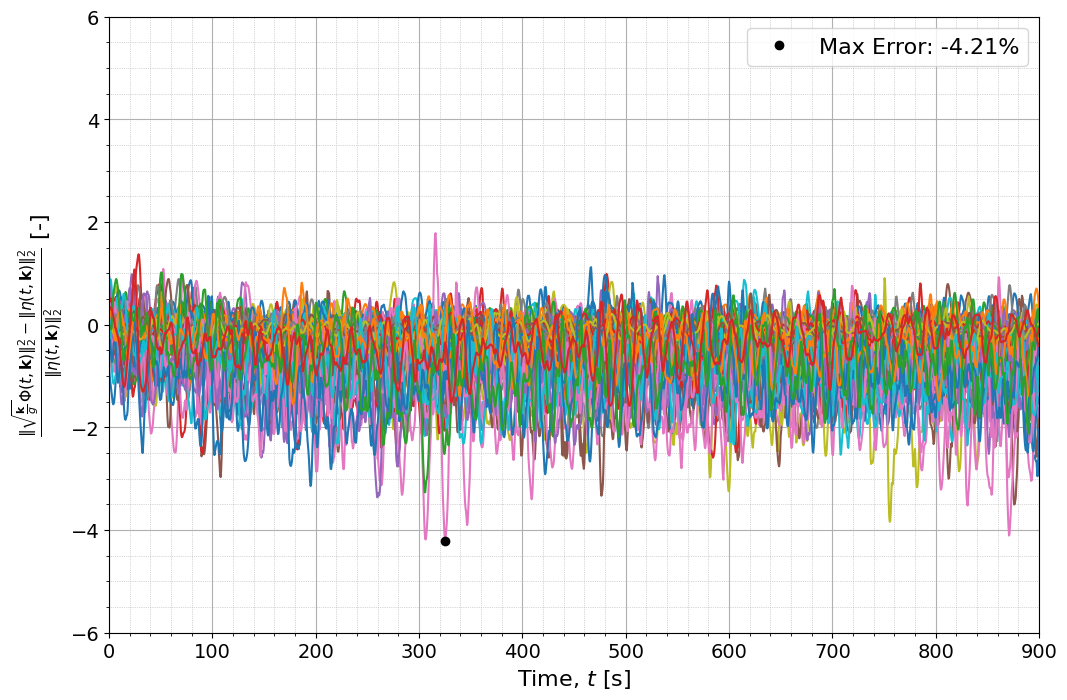

In [225]:
index = np.argmax(np.abs(eta_hat[8, 100, :]), axis=-1)



k0 = 2*np.pi/length
g = 9.81
# for index in range(1, 20):
#     # plt.plot(np.abs(eta_hat[8, :, index]))
#     # plt.plot(np.abs(phi_hat[8, :, index]*np.sqrt(k0*index/g)))
#     # plt.show()

#     e = np.abs(eta_hat[8, :, index])
#     p = np.abs(phi_hat[8, :, index]*np.sqrt(k0*index/g))

#     plt.plot(p/e)
#     plt.show()


k = np.arange(1, 513)*k0
w = np.sqrt(g*k)
corr = w / g

fig, ax = plt.subplots(figsize=(12, 8))
e = np.sum(np.abs(eta_hat[:, 200:, 1:]), axis=-1)**2
p = np.sum(np.abs(phi_hat[:, 200:, 1:])*corr, axis=-1)**2
for i in range(64):
    plt.plot(time[:-200], (e[i]-p[i])/p[i]*100)

row, col = np.unravel_index(np.argmax(np.abs(((e-p)/p))), p.shape)
plt.plot(time[col], ((e-p)/p)[row, col]*100, "o", color="k", label=f"Max Error: {((e-p)/p)[row, col]*100:.2f}%")

fontisze=14
ax.set_xlabel('Time, $t$ [s]', fontsize=fontsize)
ax.set_ylabel('$\\frac{{\\|\\sqrt{{\\frac{{\\mathbf{{k}}}}{{g}}}}\\Phi(t, \\mathbf{{k}})\\|^2_2-\\|\\eta(t, \\mathbf{{k}})\\|^2_2}}{{\\|\\eta(t, \\mathbf{{k}})\\|^2_2}}$ [-]', fontsize=fontsize)
ax.set_xlim(0, 900)
ax.set_ylim(-0.06*100, 0.06*100)
# ax.legend(fontsize=fontsize)
ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)
ax.tick_params(labelsize=fontisze)
plt.legend(fontsize=fontsize)
plt.savefig("results/error_lyapunov.pdf", dpi=300, bbox_inches='tight')



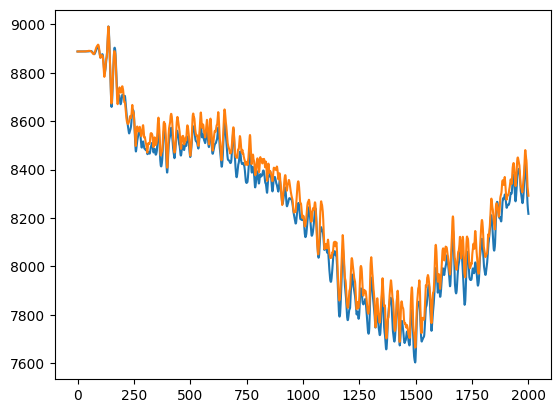

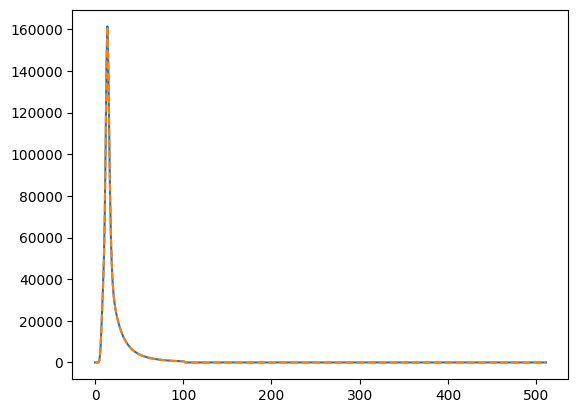

In [263]:
index = np.argmax(np.abs(eta_hat[8, 100, :]), axis=-1)

k0 = 2*np.pi/length
g = 9.81
k = np.arange(1, 513)*k0
w = np.sqrt(g*k)
corr = w / g

plt.plot(np.sum(np.abs(eta_hat[8, :, 1:]), axis=-1))
plt.plot(np.sum(np.abs(phi_hat[8, :, 1:]*corr), axis=-1))
plt.show()

plt.plot(np.real(eta_hat[8, 0, 1:].conj()*eta_hat[8, 0, 1:]))
plt.plot(np.real(phi_hat[8, 0, 1:].conj()*phi_hat[8, 0, 1:])*k/g, "--")
plt.show()

# plt.plot(np.abs(eta_hat[8, 200:, 15]))
# plt.plot(np.abs(phi_hat[8, 200:, 15]*corr[15]))
# plt.ylim(0, 400)
# plt.show()

# for index in range(1, 20):
#     plt.plot(np.abs(eta_hat[8, :, index]))
#     plt.plot(np.abs(phi_hat[8, :, index])*corr[index+1])
#     plt.show()

# k = np.